In [17]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import stlearn as st
import anndata
import pickle

import ucdeconvolve as ucd


2024-03-01 13:06:01,364|[UCD]|INFO: Updated valid user access token.


In [25]:
ucd.api.authenticate("uc_g0hUZfdLO1ay0CT7dKPS6T779NnTknXmOHBf0uLbGFqvuyTH")

2024-03-01 13:19:53,799|[UCD]|INFO: Updated valid user access token.


In [18]:
visium_A = st.Read10X("/QRISdata/Q1851/Xiao/Working_project/Tuan_project/VLP94_A/")
visium_C = st.Read10X("/QRISdata/Q1851/Xiao/Working_project/Tuan_project/VLP94_C/")
visium_B = st.Read10X("/QRISdata/Q1851/Xiao/Working_project/Tuan_project/VLP94_B/")
visium_D = st.Read10X("/QRISdata/Q1851/Xiao/Working_project/Tuan_project/VLP94_D/")


/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1840

In [19]:
samples = {"visium_A": visium_A, 
"visium_B" : visium_B,
"visium_C" : visium_C, 
"visium_D" : visium_D}

In [51]:
adata_all = list(samples.values())[0].concatenate(list(samples.values())[1:len(samples.values())], uns_merge="unique")



/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [52]:
sc.tl.pca(adata_all, svd_solver='arpack')
sc.pp.neighbors(adata_all, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_all)
sc.tl.leiden(adata_all)

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


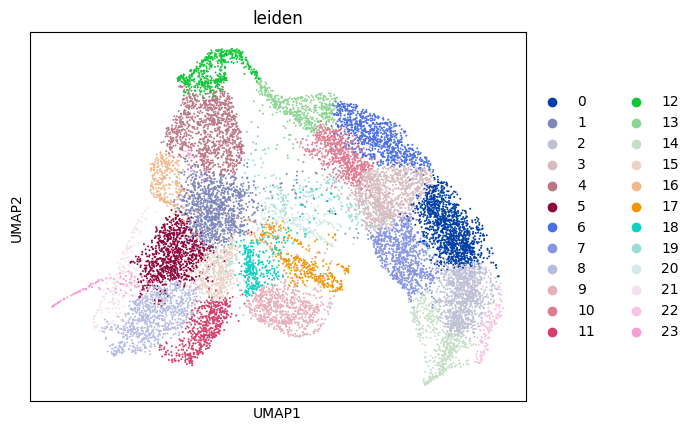

In [53]:
sc.pl.umap(adata_all, color=['leiden'])

In [54]:
ucd.tl.base(adata_all)

2024-03-01 15:36:57,976|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset | 100% (59 of 59) || Elapsed Time: 0:00:06 Time:  0:00:06
2024-03-01 15:37:09,022|[UCD]|INFO: Uploading Data | Timer Started.
2024-03-01 15:37:25,268|[UCD]|INFO: Upload Complete | Elapsed Time: 16.246 (s)
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 3 Elapsed Time: 0:00:06
Waiting For Completion | 100% (14982 of 14982) || Elapsed Time: 0:01:55 Time:  0:01:55
2024-03-01 15:39:30,710|[UCD]|INFO: Download Results | Timer Started.
2024-03-01 15:39:36,216|[UCD]|INFO: Download Complete | Elapsed Time: 5.505 (s)
2024-03-01 15:39:37,306|[UCD]|INFO: Run Complete | Elapsed Time: 159.33 (s)


In [55]:
ucd.utils.assign_top_celltypes(adata_all, category = "raw", groupby = "leiden")

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


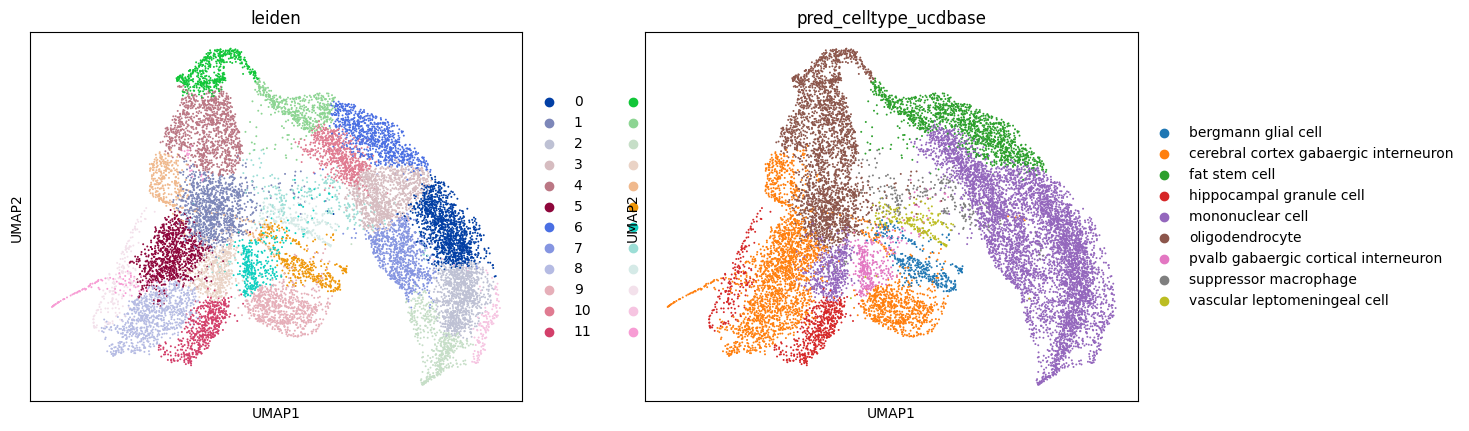

In [56]:
sc.pl.umap(adata_all, color=['leiden',"pred_celltype_ucdbase"])

In [45]:
adata_all_uns.obs["pred_celltype_ucdbase"] = adata_all.obs["pred_celltype_ucdbase"]
adata_all_uns.uns["spatial"].keys()

dict_keys(['VLP94_A', 'VLP94_B', 'VLP94_C', 'VLP94_D'])

In [50]:
adata_all_uns.uns["spatial"]

{'VLP94_A': {'images': {'hires': array([[[0.9372549 , 0.9411765 , 0.9254902 ],
           [0.9411765 , 0.9411765 , 0.9254902 ],
           [0.9411765 , 0.9411765 , 0.92941177],
           ...,
           [0.93333334, 0.93333334, 0.91764706],
           [0.93333334, 0.93333334, 0.91764706],
           [0.9372549 , 0.93333334, 0.9137255 ]],
   
          [[0.9372549 , 0.9411765 , 0.92941177],
           [0.9411765 , 0.9411765 , 0.92941177],
           [0.9411765 , 0.9411765 , 0.92941177],
           ...,
           [0.93333334, 0.93333334, 0.91764706],
           [0.93333334, 0.93333334, 0.91764706],
           [0.9372549 , 0.93333334, 0.91764706]],
   
          [[0.9372549 , 0.9411765 , 0.92941177],
           [0.9372549 , 0.9411765 , 0.92941177],
           [0.9372549 , 0.9411765 , 0.9254902 ],
           ...,
           [0.93333334, 0.93333334, 0.91764706],
           [0.93333334, 0.93333334, 0.91764706],
           [0.93333334, 0.93333334, 0.91764706]],
   
          ...,
   
      

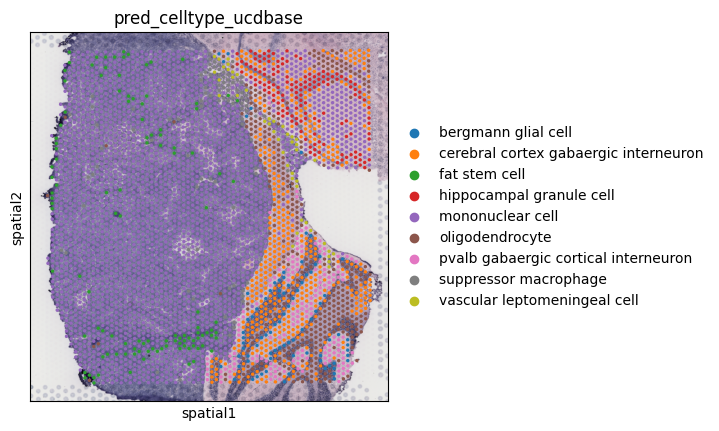

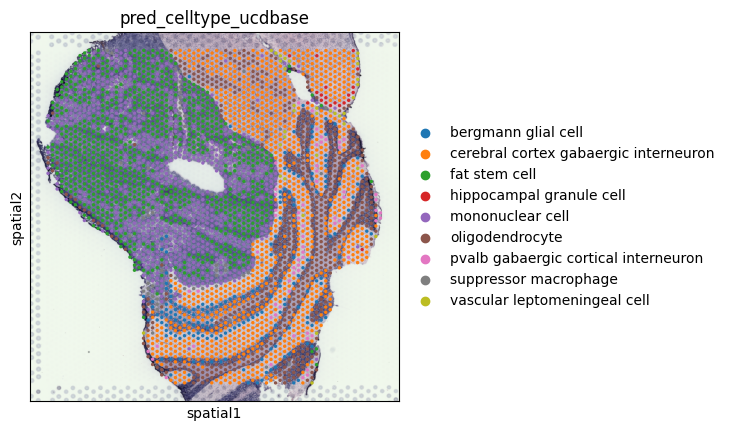

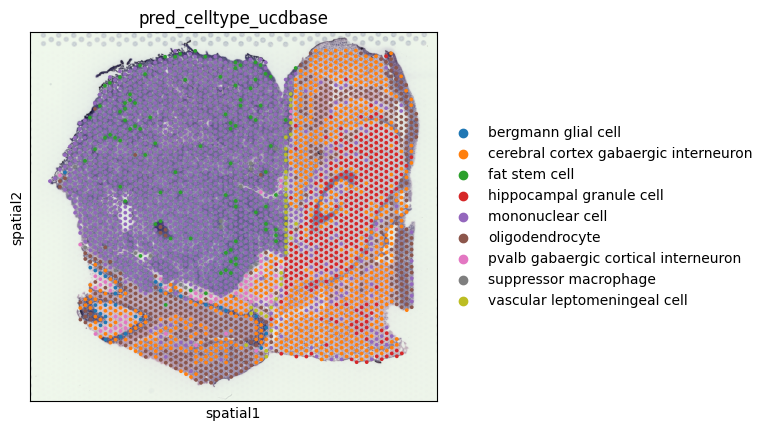

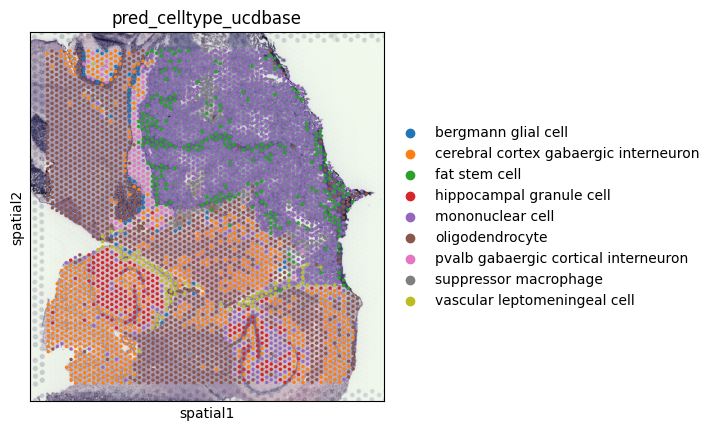

In [69]:
sc.pl.spatial(adata_all[adata_all.obs["batch"]== "0"], library_id="VLP94_A", img_key="hires", color="pred_celltype_ucdbase")
sc.pl.spatial(adata_all[adata_all.obs["batch"]== "1"], library_id="VLP94_B", img_key="hires", color="pred_celltype_ucdbase")
sc.pl.spatial(adata_all[adata_all.obs["batch"]== "2"], library_id="VLP94_C", img_key="hires", color="pred_celltype_ucdbase")
sc.pl.spatial(adata_all[adata_all.obs["batch"]== "3"], library_id="VLP94_D", img_key="hires", color="pred_celltype_ucdbase")


In [70]:
ucd.utils.list_prebuilt_references()

['allen-mouse-cortex',
 'enge2017-human-pancreas',
 'lee-human-pbmc-covid',
 'nygc-multimodal-pbmc']

In [71]:
ucd.tl.select(adata_all, "allen-mouse-cortex")

2024-03-01 17:04:26,351|[UCD]|INFO: Starting UCDeconvolveSELECT Run. | Timer Started.
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Preprocessing Mix | 100% (59 of 59) |####| Elapsed Time: 0:00:07 Time:  0:00:07
Preprocessing Ref | 100% (1 of 1) |######| Elapsed Time: 0:00:00 Time:  0:00:00
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
2024-03-01 17:04:37,722|[UCD]|INFO: Uploading Data | Timer Started.
2024-03-01 17:04:49,595|[UCD]|INFO: Upload Complete | Elapsed Time: 11.872 (s)
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 4 Elapsed Time: 0:00:08
Waiting For Completion | 100% (14982 of 14982) || Elapsed Time: 0:06:51 Time:  0:06:51ays, 23:37:544
2024

OSError: Unable to open file (file signature not found)

In [ ]:
ucd.utils.assign_top_celltypes(adata_all, "ucdselect", groupby = "leiden_hires")